# Alignment (Exploratory)
This notebook looks at the differences between a train and test set, specifically the NC17_EvalPart1 (train) and MFC18_EvalPart1 (test) datasets. Insights from this exploratory analysis will hopefully give us a better sense of how we can use sample-based explanations to help us fix the domain mismatch between these two datasets, and bring them into closer "alignment" with one another.

In [2]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')  # for scripts
sys.path.insert(0, os.getcwd() + '/../../')  # for util

from scripts.alignment_explore1 import feature_similarity, feature_clustering
from scripts.alignment_explore2 import ablation
from scripts.alignment_explore3 import impact_vs_weight
data_dir = '../../data'

## Idenitfying Domain Mismatch
### Feature Similarity
This section analyzes the similarity of data points between the train and test sets, specifically looking at the extracted feature representations and using a kernel to measure the similarity between points.

model (LGBMClassifier)
train set acc: 1.000000
missed train instances (0)
train log loss: 0.02060
model (LGBMClassifier)
test set acc: 0.817634
missed test instances (3177)
test log loss: 0.58381

test and train similarity: 0.301
manip test and train similarity: 0.282
nonmanip test and train similarity: 0.306
manip test and manip train similarity: 0.182
manip test and nonmanip train similarity: 0.342
nonmanip test and manip train similarity: 0.132
nonmanip test and nonmanip train similarity: 0.409


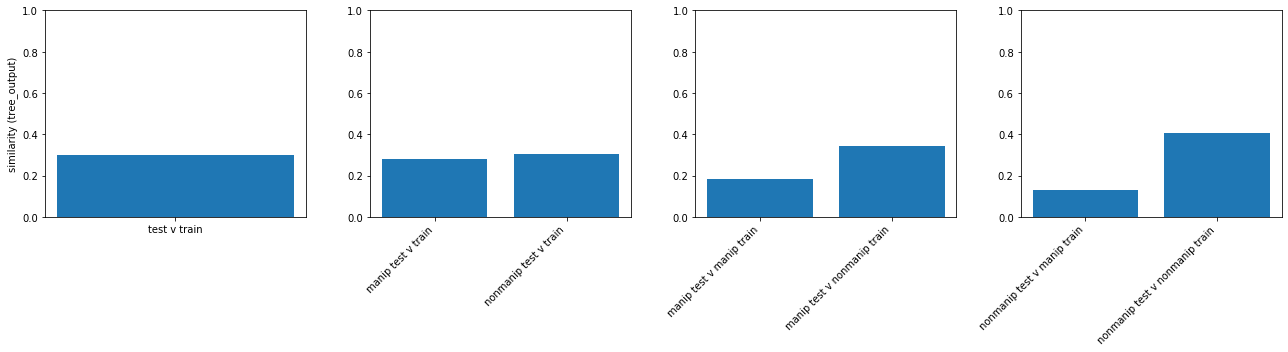

In [8]:
feature_similarity(model='lgb', encoding='tree_output', dataset='medifor', n_estimators=100, random_state=1,
                   test_subset=20000, agg_type='mean', data_dir=data_dir, verbose=False)

### Feature Clustering
We can use tsne to visualize the domain mismatch in our high-dimensional medifor datasets. We'll take our train and test sets, concatenate them, extract the tree representation features, reduce their dimensionality using PCA, and then embed them into a 2D space using TSNE.

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.01417
train auroc: 1.000
test set acc: 0.925828
test log loss: 0.20638
test auroc: 0.974
concatenating X_train and X_test...
embedding with tsne...


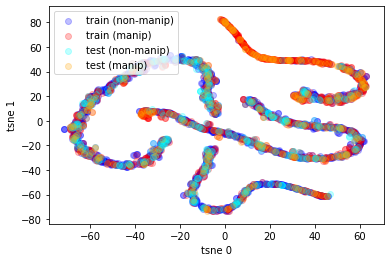

In [3]:
feature_clustering(model='lgb', encoding='none', dataset='medifor2', random_state=1, verbose=0, data_dir=data_dir)

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.01417
train auroc: 1.000
test set acc: 0.925828
test log loss: 0.20638
test auroc: 0.974
concatenating X_train and X_test...
exracting tree features...
reducing dimensionality from 100 to 50 with PCA...
embedding with tsne...


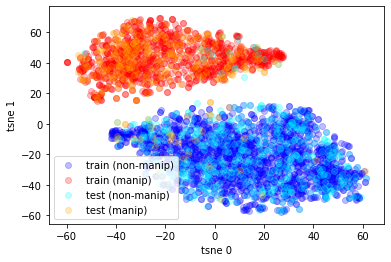

In [3]:
feature_clustering(model='lgb', encoding='tree_output', dataset='medifor2', random_state=1, verbose=0, data_dir=data_dir)

model (LGBMClassifier)
train set acc: 0.969934
train log loss: 0.10119
train auroc: 0.995
test set acc: 0.924247
test log loss: 0.18653
test auroc: 0.960
concatenating X_train and X_test...
exracting tree features...
reducing dimensionality from 100 to 50 with PCA...
embedding with tsne...


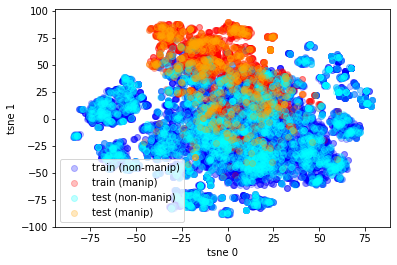

In [4]:
feature_clustering(model='lgb', encoding='tree_output', dataset='medifor3', random_state=1, verbose=0, data_dir=data_dir)

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
test log loss: 0.58381
test auroc: 0.711
concatenating X_train and X_test...
exracting tree features...
reducing dimensionality from 100 to 50 with PCA...
embedding with tsne...


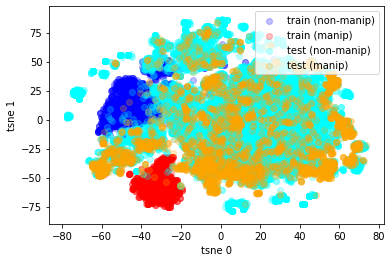

In [5]:
feature_clustering(model='lgb', encoding='tree_output', dataset='medifor', random_state=1, verbose=0, data_dir=data_dir)

## Feature Ablation
This section analyzes the effect of removing various features from the training data. We greedily remove features one at a time that have the biggest impact on the test set.

100%|██████████| 36/36 [00:22<00:00,  1.18it/s]


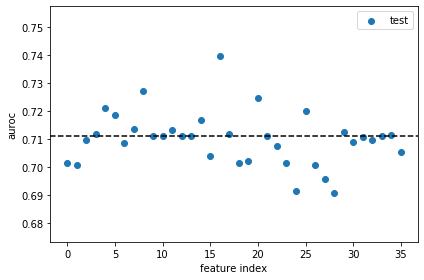

auroc before removal: 0.711 (test), 1.000 (train)
auroc after removal: 0.740 (test)
removed feature: p_fibberinh_1_0_mediforsystem, index: 16, original index: 16


100%|██████████| 35/35 [00:19<00:00,  1.81it/s]


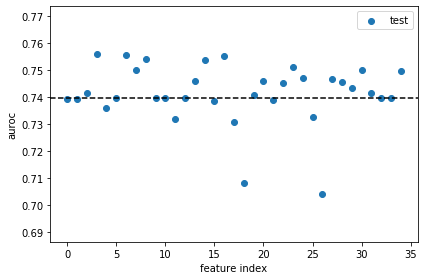

auroc before removal: 0.740 (test), 1.000 (train)
auroc after removal: 0.756 (test)
removed feature: combo01_baseline_ta1, index: 3, original index: 4


100%|██████████| 34/34 [00:16<00:00,  2.11it/s]


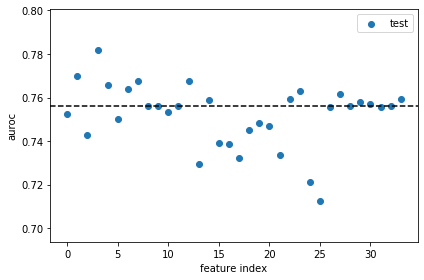

auroc before removal: 0.756 (test), 1.000 (train)
auroc after removal: 0.782 (test)
removed feature: copymove01_baseline_ta1, index: 3, original index: 5


100%|██████████| 33/33 [00:16<00:00,  2.00it/s]


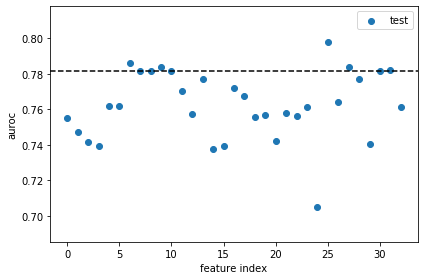

auroc before removal: 0.782 (test), 1.000 (train)
auroc after removal: 0.798 (test)
removed feature: p_ucrlstmwresamplingwcmm2_1_0_mediforsystem, index: 25, original index: 28


100%|██████████| 32/32 [00:15<00:00,  2.16it/s]


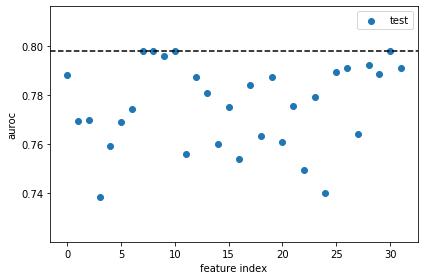

features removed: [16, 4, 5, 28]


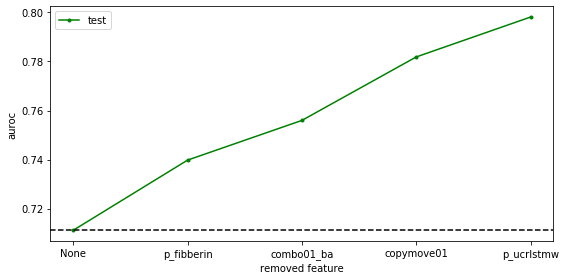

In [2]:
ablation(model='lgb', dataset='medifor', n_estimators=100, random_state=1, plot=True, data_dir=data_dir)

## Train Impact vs Train Coefficients
This section anaylzes the correlation between support vector weights against the overall impact that the support vectors have on a given set of test instances.

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
test log loss: 0.58381
test auroc: 0.711


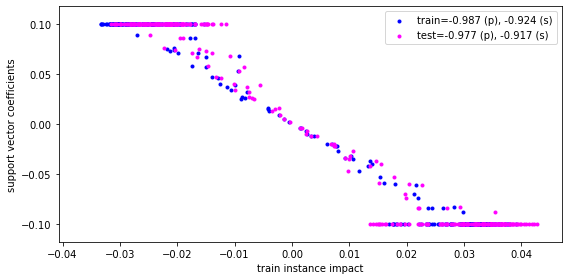

In [4]:
impact_vs_weight(model='lgb', encoding='tree_output', dataset='medifor', n_estimators=100, random_state=1, plot=True, data_dir=data_dir)